In [ ]:
'''
【课程1.3】  对比分析

对比分析 → 两个互相联系的指标进行比较

绝对数比较（相减） / 相对数比较（相除）
结构分析、比例分析、空间比较分析、动态对比分析

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# matplotlib中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

                A_sale      B_sale
2019-06-01  817.763092  788.969045
2019-06-02  625.867041  592.828983
2019-06-03  187.196491  535.234605
2019-06-04  322.496069  435.249839
2019-06-05  570.493213  326.364238


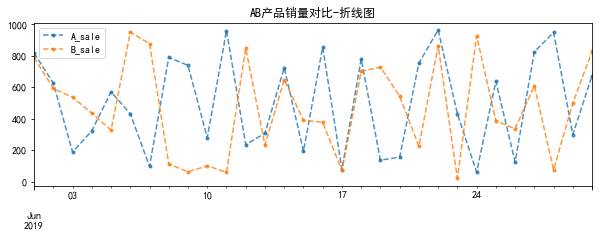

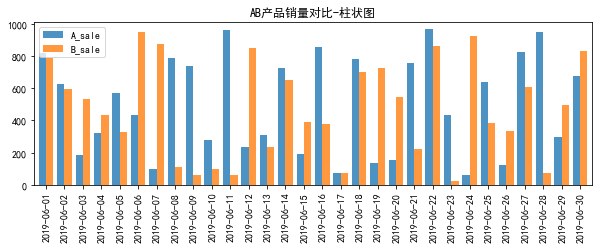

In [3]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较

data= pd.DataFrame(np.random.rand(30,2)*1000,
                  columns=['A_sale', 'B_sale'],
                  index=pd.period_range('20190601','20190630'))
print(data.head())
# 创建数据 → 30天内A/B产品的日销售额

data.plot(kind='line',
         style='--.',
         alpha=0.8,
         figsize=(10,3),
         title='AB产品销量对比-折线图')
# 折线图比较

data.plot(kind='bar',
         width=0.8,
         alpha=0.8,
         figsize=(10,3),
         title='AB产品销量对比-柱状图')
# 多系列 柱状图比较

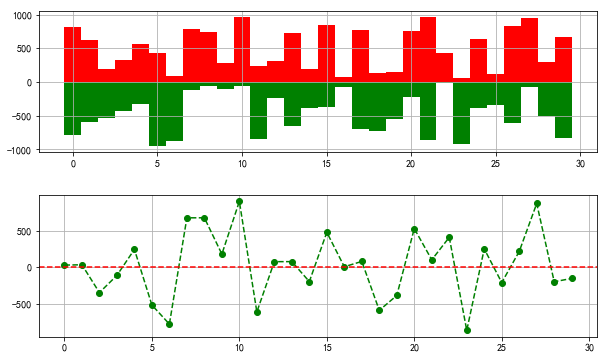

In [4]:
# 1、绝对数比较 → 相减

x =  range(len(data))
y1 = data['A_sale']
y2 = - data['B_sale']

fig3 = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.3)

ax1 = fig3.add_subplot(2,1,1)
# plt.bar(x,y1)
# plt.bar(x,y2)
plt.bar(x,y1,width=1,facecolor='r')
plt.bar(x,y2,width=1,facecolor='g')
plt.grid()

ax2 = fig3.add_subplot(2,1,2)
y3 = data['A_sale'] - data['B_sale']
plt.plot(x, y3, '--go')
plt.grid()
plt.axhline(0, color='r', linestyle='--')  # 添加0的辅助参考线

                A_sale      B_sale
2017-06-01   15.462966   63.010014
2017-06-02   46.732713  171.056585
2017-06-03  943.994159   10.029968
2017-06-04  705.450070   28.063187
2017-06-05  601.984747  195.446599
------
                A_sale      B_sale     A_per     B_per  A_per%  B_per%
2017-06-01   15.462966   63.010014  0.001091  0.019578  0.109%  1.958%
2017-06-02   46.732713  171.056585  0.003298  0.053149  0.330%  5.315%
2017-06-03  943.994159   10.029968  0.066614  0.003116  6.661%  0.312%
2017-06-04  705.450070   28.063187  0.049781  0.008720  4.978%  0.872%
2017-06-05  601.984747  195.446599  0.042479  0.060727  4.248%  6.073%


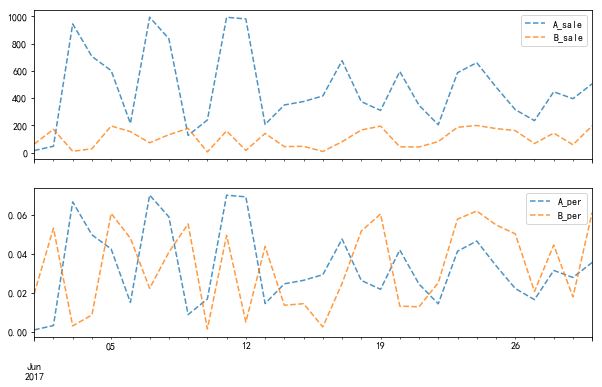

In [11]:
# 2、相对数比较 → 相除

# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析

# （1）结构分析
# 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A/B产品的日销售额
# A/B产品销售额量级不同

data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()
data['A_per%'] = data['A_per'].apply(lambda x:"%.3f%%" % (x*100))   # 加上"%"百分号的显示
data['B_per%'] = data['B_per'].apply(lambda x:"%.3f%%" % (x*100)) 
# 计算出每天的营收占比
print(data.head())

fig,axes = plt.subplots(2,1,figsize=(10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style='--',alpha=0.8,ax=axes[0])
axes[0].legend(loc='upper right')
data[['A_per','B_per']].plot(kind='line',style='--',alpha=0.8,ax=axes[1])
axes[1].legend(loc='upper right')
# 绝对值对比较难看出结构性变化，通过看销售额占比来看售卖情况的对比

# 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
# 例如：国内生产总值“元/人”，人口密度“人/平方公里”

         consumption       salary
2019-01  4443.264260  9071.538168
2019-02  4350.104280  9011.739972
2019-03  4711.543976  9268.954397
2019-04  4514.154212  9203.731649
2019-05  4442.499239  9052.011251
------
         consumption       salary       c_s
2019-01  4443.264260  9071.538168  0.489803
2019-02  4350.104280  9011.739972  0.482715
2019-03  4711.543976  9268.954397  0.508315
2019-04  4514.154212  9203.731649  0.490470
2019-05  4442.499239  9052.011251  0.490775


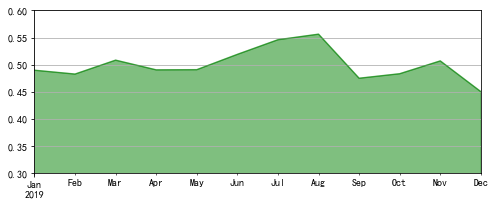

In [19]:
# 2、相对数比较 → 相除
# （2）比例分析
# 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”
# 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

data = pd.DataFrame({'consumption':np.random.rand(12)*1000+4000,
                    'salary':np.random.rand(12)*500+8800},
                   index=pd.period_range('2019/1','2019/12', freq='M'))
print(data.head())
print('------')
# 创建数据 → 某人一年内的消费、工资薪水情况
# 消费按照2000-3000/月随机，工资按照5000-5500/月随机

data['c_s'] = data['consumption'] / data['salary']
print(data.head())
# 比例相对数 → 消费收入比

data['c_s'].plot.area(color = 'green',alpha = 0.5, ylim = [0.3,0.6], figsize=(8,3), grid=True)
# 创建面积图表达

                      A            B            C           D
2017-06-01  2403.317997   855.853524  5669.022867  445.849842
2017-06-02   406.437209  1588.595095  6313.173182  431.193366
2017-06-03  4502.829157   400.063623  3982.048747  272.666109
2017-06-04  2229.511474  1472.765746  1470.873759  787.817542
2017-06-05   807.490540   503.281688  3419.570680  323.020823
------


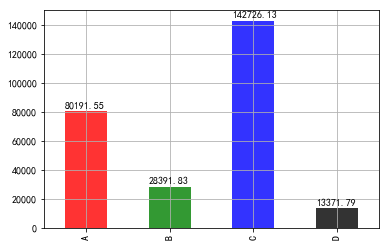

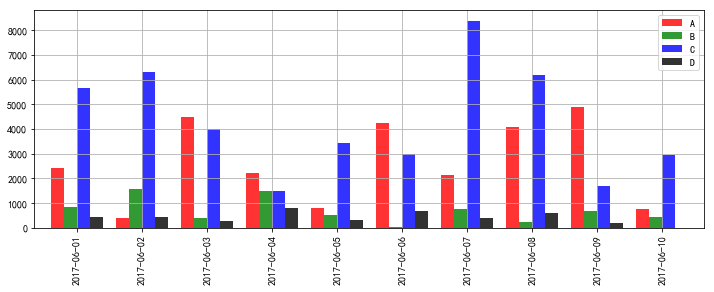

In [23]:
# 2、相对数比较 → 相除
# （3）空间比较分析（横向对比分析）
# 同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
# 空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值
# 一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事

data = pd.DataFrame({'A':np.random.rand(30)*5000,
                    'B':np.random.rand(30)*2000,
                    'C':np.random.rand(30)*10000,
                    'D':np.random.rand(30)*800},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A/B/C/D四个产品的销售情况
# 不同产品的销售量级不同

data.sum().plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True)
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+2000,'%.2f' % j, color = 'k')
# 通过柱状图做横向比较 → 4个产品的销售额总量

data[:10].plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True, figsize = (12,4),width = 0.8)
# 多系列柱状图，横向比较前十天4个产品的销售额

# 关于同比与环比
# 同比 → 产品A在2015.3和2016.3的比较（相邻时间段的同一时间点）
# 环比 → 产品A在2015.3和2015.4的比较（相邻时间段的比较）
# 如何界定“相邻时间段”与“时间点”，决定了是同比还是环比

In [25]:
# 2、相对数比较 → 相除
# （4）动态对比分析（纵向对比分析）
# 同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势
# 最基本方法，计算动态相对数 → 发展速度
# 动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值
# 基期：用来比较的基础时期
# 报告期：所要研究的时期，又称计算期

data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A产品的销售情况

data['base'] = 1000
data

                      A
2017-06-01  1907.925067
2017-06-02  1184.603023
2017-06-03  1222.994514
2017-06-04  1355.260537
2017-06-05  2159.897280
------


,A,base
2017-06-01,1907.925067,1000
2017-06-02,1184.603023,1000
2017-06-03,1222.994514,1000
2017-06-04,1355.260537,1000
2017-06-05,2159.897280,1000
2017-06-06,1340.452997,1000
2017-06-07,1958.975981,1000
2017-06-08,2558.589163,1000
2017-06-09,2453.237220,1000
2017-06-10,2720.840380,1000
